<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr

Загрузить датасет по url:


In [100]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

*  **Страна (регион)** Название страны.
*  **Лестница** Cantril Ladder - это показатель удовлетворенности жизнью.
*  **SD Лестницы** Стандартное отклонение лестницы.
*  **Положительный эффект** Мера положительных эмоций.
*  **Негативный аффект** Мера негативных эмоций.
*  **Социальная поддержка** Степень, в которой социальная поддержка способствовала вычислению показателя счастья.
*  **Свобода** Степень, в которой Свобода внесла свой вклад в расчет показателя счастья.
*  **Коррупция** Степень, в которой Восприятие коррупции способствует оценке счастья.
*  **Щедрость** Степень, в которой Щедрость способствовала вычислению показателя счастья.
*  **Журнал ВВП на душу населения** Степень, в которой ВВП влияет на расчет показателя счастья.
*  **Ожидаемая продолжительность здоровой жизни** Степень, в которой ожидаемая продолжительность жизни повлияла на расчет показателя счастья.

Посмотреть первые несколько рядов таблицы

In [98]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

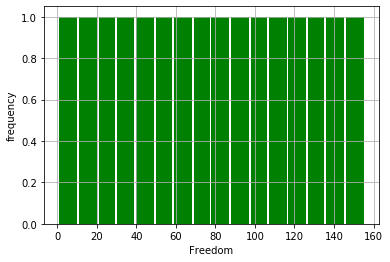

In [38]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 170, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

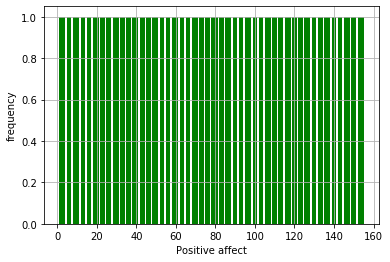

In [39]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Positive affect'], 200, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

На двух гистограммах выше нет ярко выраженных пиков. Каждый интервал гистограммы содержит примерно равное количество значений, а значит это **равномерное распределение**

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [107]:
# ВЫБРОС ОТСУТСТВУЕТ ЗНАЧЕНИЕ В ДАННОЙ КОЛОНКЕ 
df.Freedom.isnull().sum()

1

In [108]:
df = df.dropna()

In [78]:
print('Математическое ожидание: ',statistics.mean(df.Freedom))

Математическое ожидание:  78.82857142857142


In [77]:
print('Математическое ожидание: ', sum(df['Freedom'])/len(df['Freedom']))

Математическое ожидание:  78.82857142857142


In [75]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  79.5


In [83]:
print('Значение моды: ', statistics.mode(df['Freedom']))

StatisticsError: no unique mode; found 140 equally common values

In [90]:
print('Стандартное отклонение: ', statistics.pstdev(df.Freedom))


Стандартное отклонение:  44.9475794449399


In [91]:
print('Дисперсия : ', statistics.pvariance(df.Freedom))

Дисперсия :  2020.2848979591836


In [93]:
print('Минимум: ', min(df.Freedom))

Минимум:  1.0


In [94]:
print('Максимум : ', max(df.Freedom))

Максимум :  155.0


In [109]:
print('Размах : ', max(df.Freedom) - min(df.Freedom))

Размах :  154.0


Почему нельзя найти моду?

### Если все значения в данном наборе чисел попадаются одинаковое количество раз, что мы увидели из гистограммы ранее, то у этого множества нет моды, поскольку ни одно число не встречается чаще, чем любое другое. 

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

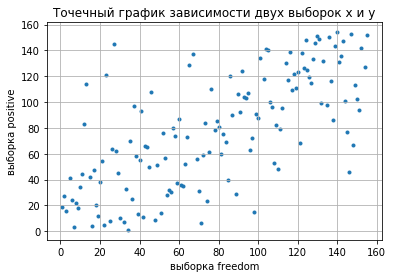

In [111]:
freedom = df['Freedom']
positive = df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive, marker='.')

In [114]:
corr, p_value = pearsonr(freedom, positive)
print(corr)

0.6965670458090685


### коэффициент пирсона говорит о том, что зависимость между данными выборками средняя

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [115]:
freedom = df['Freedom']
print(statistics.mean(freedom))

78.82857142857142


In [116]:
freedom1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom1))

6.496390726949487e-15


In [117]:
min(freedom1)

-77.82857142857142

In [118]:
max(freedom1)

76.17142857142858

In [119]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom2 = min_max_scaler.fit_transform(np.array(freedom1).reshape(-1, 1))
print(min(freedom2))
print(max(freedom2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

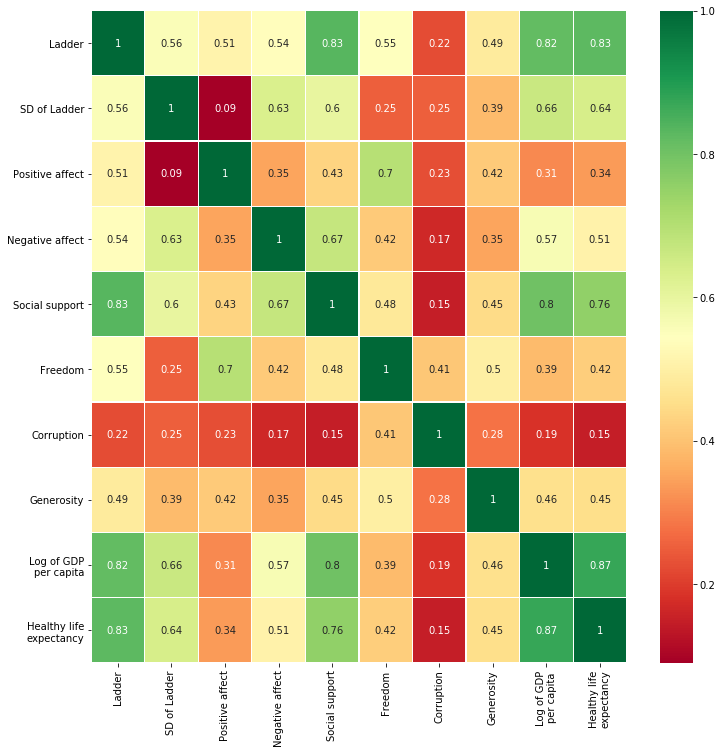

In [120]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [137]:
df=pd.read_csv('avocado.csv')
df[:3]


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

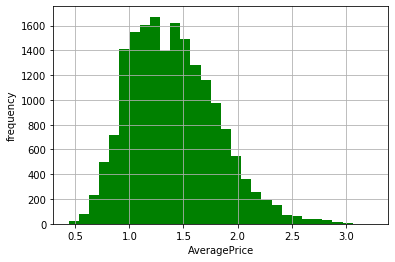

In [135]:
n, bins, patches = plt.hist(df['AveragePrice'], 30, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

### правобокое нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [138]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['4046', '4225', '4770', 'AveragePrice'])

In [143]:
df.corr()

,4046,4225,4770,AveragePrice
4046,1.000000,0.040687,-0.033149,0.023373
4225,0.040687,1.000000,0.016052,0.025835
4770,-0.033149,0.016052,1.000000,-0.000371
AveragePrice,0.023373,0.025835,-0.000371,1.000000


### в основном все коэф. близки к 0, что указывает на слабую корреляцию между переменными и, соответственно, низкую зависимость. Между собой не будут совсем (или почти совсем) влиять на друг друга 
